# Students Drugs Addiction Prediction

### *Chapter 1 - Data Understanding/Exploration*

##### 1. Importing libraries 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score




##### 2. Loading data

In [13]:
data= pd.read_csv('combined_dataset.csv')
data = data.drop(columns=['Experimentation'])

In [14]:
data.head()

,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,Yes,No,Yes,No,No,No,Yes,No,No
1,No,Yes,No,No,Yes,No,Yes,No,No,No
2,No,No,Yes,No,Yes,No,No,Yes,No,No
3,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes
4,No,No,No,Yes,No,No,No,No,Yes,No


In [15]:
# Veri setinin genel bilgilerini görüntüleme
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63086 entries, 0 to 63085
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Academic_Performance_Decline        59903 non-null  object
 1   Social_Isolation                    59859 non-null  object
 2   Financial_Issues                    59929 non-null  object
 3   Physical_Mental_Health_Problems     59967 non-null  object
 4   Legal_Consequences                  59824 non-null  object
 5   Relationship_Strain                 59911 non-null  object
 6   Risk_Taking_Behavior                59896 non-null  object
 7   Withdrawal_Symptoms                 59821 non-null  object
 8   Denial_and_Resistance_to_Treatment  59979 non-null  object
 9   Addiction_Class                     63086 non-null  object
dtypes: object(10)
memory usage: 4.8+ MB
None


### *Chapter 2 - Data Preprocessing*

##### 1. Missing values control

In [16]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Academic_Performance_Decline          3183
Social_Isolation                      3227
Financial_Issues                      3157
Physical_Mental_Health_Problems       3119
Legal_Consequences                    3262
Relationship_Strain                   3175
Risk_Taking_Behavior                  3190
Withdrawal_Symptoms                   3265
Denial_and_Resistance_to_Treatment    3107
Addiction_Class                          0
dtype: int64


In [17]:
data.head()

,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,Yes,No,Yes,No,No,No,Yes,No,No
1,No,Yes,No,No,Yes,No,Yes,No,No,No
2,No,No,Yes,No,Yes,No,No,Yes,No,No
3,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes
4,No,No,No,Yes,No,No,No,No,Yes,No


##### 2. Delete rows with all missing data

In [18]:

data = data.dropna()

# control missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Academic_Performance_Decline          0
Social_Isolation                      0
Financial_Issues                      0
Physical_Mental_Health_Problems       0
Legal_Consequences                    0
Relationship_Strain                   0
Risk_Taking_Behavior                  0
Withdrawal_Symptoms                   0
Denial_and_Resistance_to_Treatment    0
Addiction_Class                       0
dtype: int64


##### 3. Convert the data 1 and 0 

why convert 1 and 0?

- Many machine learning algorithms require inputs to be numerical. For example, logistic regression, SVM, and artificial neural networks work with numerical inputs.
Algorithms perform mathematical operations and these operations are defined on numerical data.
Data Processing and Optimization:

- Numerical data is processed faster and more efficiently. Computers easily process and optimize numerical data.
Comparing text-based data such as "Yes" and "No" can be slower than numerical comparisons.


- Numerical transformation allows algorithms to perform better. For example, logistic regression can better model the relationship between 1 and 0.

In [19]:
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])


In [20]:
data.head()

,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1,1,0,1,0,0,0,1,0,0
1,0,1,0,0,1,0,1,0,0,0
2,0,0,1,0,1,0,0,1,0,0
3,0,1,0,1,1,0,1,0,1,1
4,0,0,0,1,0,0,0,0,1,0


### Chapter 3 : Data Visualization

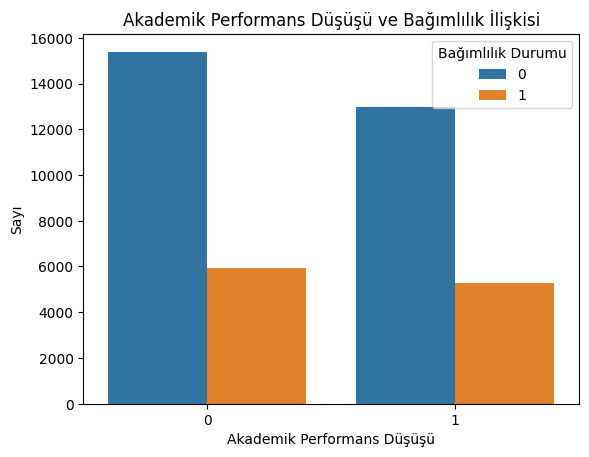

In [21]:
sns.countplot(x='Academic_Performance_Decline', hue='Addiction_Class', data=data)
plt.title('Akademik Performans Düşüşü ve Bağımlılık İlişkisi')
plt.xlabel('Akademik Performans Düşüşü')
plt.ylabel('Sayı')
plt.legend(title='Bağımlılık Durumu')
plt.show()

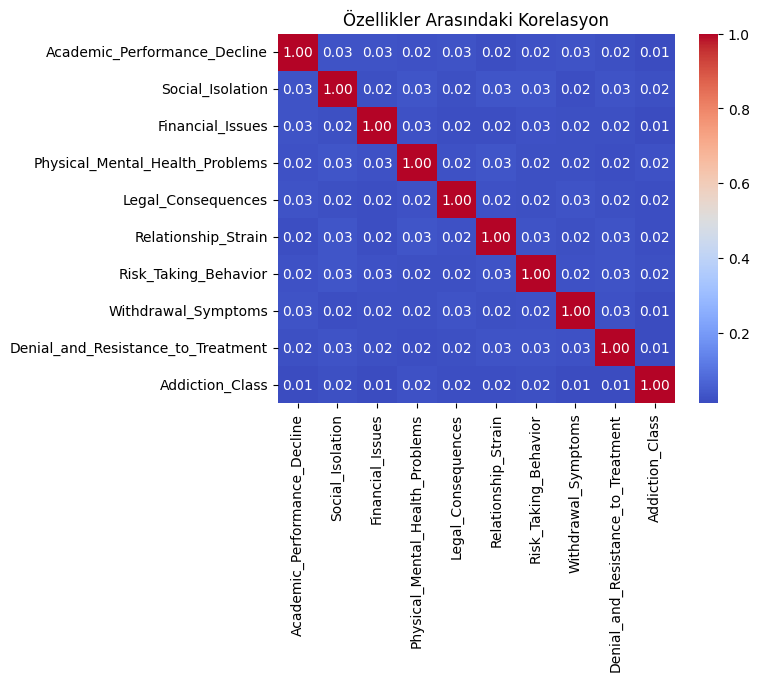

In [22]:
# Korelasyon matrisini görselleştirme
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Özellikler Arasındaki Korelasyon')
plt.show()

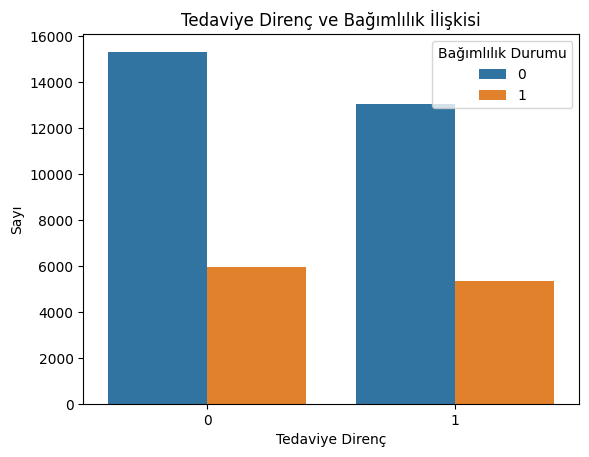

In [23]:
sns.countplot(x='Denial_and_Resistance_to_Treatment', hue='Addiction_Class', data=data)
plt.title('Tedaviye Direnç ve Bağımlılık İlişkisi')
plt.xlabel('Tedaviye Direnç')
plt.ylabel('Sayı')
plt.legend(title='Bağımlılık Durumu')
plt.show()

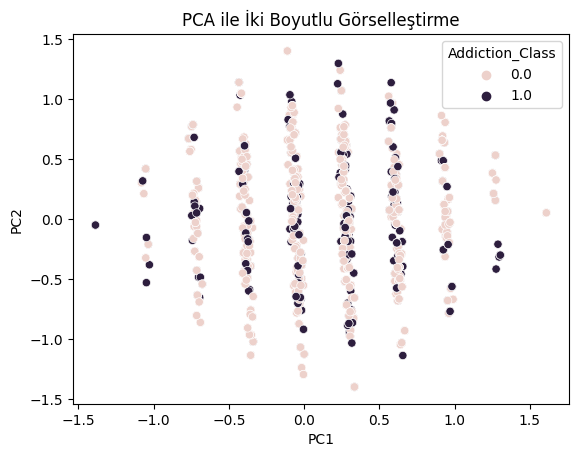

In [24]:
from sklearn.decomposition import PCA

# PCA ile veri setini iki boyuta indirgeyip görselleştirme
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data.drop('Addiction_Class', axis=1))
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Addiction_Class'] = data['Addiction_Class']

sns.scatterplot(x='PC1', y='PC2', hue='Addiction_Class', data=pca_df)
plt.title('PCA ile İki Boyutlu Görselleştirme')
plt.show()

### *Chapter 4 : Modelling*

 Algorithms We Use

1. **K-Nearest Neighbours (KNN)**:
   KNN looks at the nearest neighbors to classify a new data point. It is simple and intuitive, but can be slow with large datasets.
   - n_neighbors: Number of neighbors (how many neighbors to look at).
   - metric: Distance measurement (how to calculate distance between points).
   - weights: Weighting (how to weight the neighbors).

2. **Support Vector Machine (SVM)**:
   SVM finds the best boundary between classes. It works well in high-dimensional spaces and uses flexible kernel functions.
   - **C**: Regularization parameter (controls error tolerance; large C means less error, small C means more error).
   - **kernel**: Kernel type (how to transform the feature space; e.g., 'linear', 'poly', 'rbf', 'sigmoid').
   - **gamma**: Kernel coefficient (important for 'rbf', 'poly', and 'sigmoid' kernels; high gamma means narrow decision boundary, low gamma means wide boundary).

3. **Naive Bayes**:
   Naive Bayes classifiers assume features are independent. They are usually fast and effective, especially for small datasets and real-time predictions.
   - Different variants: Gaussian, Multinomial, Bernoulli.

4. **Decision Tree**:
   Decision Trees make decisions by splitting data into branches based on features. They are easy to understand and visualize, but deep trees can overfit.
   - **max_depth**: Maximum depth (how deep the tree can go).
   - **min_samples_split**: Minimum samples for split (minimum number of samples needed to split a node).
   - **min_samples_leaf**: Minimum samples in leaf (minimum number of samples in a leaf node).

5. **Random Forest**:
   Random Forest combines multiple decision trees to create a stable and generalizable model. Each tree is trained on a random subset, reducing overfitting.
   - **n_estimators**: Number of trees (how many trees in the forest).
   - **max_depth**: Maximum depth of each tree.
   - **min_samples_split**: Minimum samples for split.
   - **min_samples_leaf**: Minimum samples in leaf.

6. **Gradient Boosting**:
   Gradient Boosting builds strong learners by training weak learners sequentially to reduce errors. It is effective but can be slow to train.
   - **n_estimators**: Number of boosting stages.
   - **learning_rate**: Learning rate (contribution of each boosting stage).
   - **max_depth**: Maximum depth of each weak learner.
   - **min_samples_split**: Minimum samples for split.
   - **min_samples_leaf**: Minimum samples in leaf.

7. **Logistic Regression**:
Logistic Regression is used for binary classification problems. It models the probability that a given input belongs to a certain class.
   -   solver: Algorithm to use in the optimization problem (e.g., 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga').
   -   C: Regularization parameter (controls the trade-off between achieving a low error on the training set and minimizing the norm of the weights).
   -   max_iter: Maximum number of iterations (maximum number of iterations taken for the solvers to converge).



In [25]:

X = data.drop(columns=['Addiction_Class'])
y = data['Addiction_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
class_counts = Counter(y_train)
print(f"Class 0 count: {class_counts[0]}")
print(f"Class 1 count: {class_counts[1]}")


Class 0 count: 22678
Class 1 count: 9002


In [26]:
#Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class_counts = Counter(y_train)
print(f"Class 0 count: {class_counts[0]}")
print(f"Class 1 count: {class_counts[1]}")

Class 0 count: 22678
Class 1 count: 22678


#### 1. K-Nearest Neighbours (KNN):

In [ ]:
knn_model = KNeighborsClassifier(n_estimators=100,min_samples_leaf=1,min_samples_split=5,max_depth=None)

knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
print("\nKNN Report:")
print(classification_report(y_test, knn_pred, zero_division=1))


print("KNN Classification Accuracy:", knn_accuracy)

cv_scores_rf = cross_val_score(knn_model, X_train, y_train, cv=5)
print("\nKNN Cross Validation Scores:")
print(cv_scores_rf)
print("KNN Cross Validation Score Mean:", cv_scores_rf.mean())


KNN Report:
              precision    recall  f1-score   support

           0       0.73      0.50      0.59      5672
           1       0.29      0.52      0.37      2248

    accuracy                           0.51      7920
   macro avg       0.51      0.51      0.48      7920
weighted avg       0.60      0.51      0.53      7920

KNN Classification Accuracy: 0.5080808080808081

KNN Cross Validation Scores:
[0.51984127 0.52871789 0.53522214 0.53356852 0.53588359]
KNN Cross Validation Score Mean: 0.5306466797206517


#### 2. Support Vector Machine (SVM):

In [ ]:
svm_model = SVC( C=0.1, gamma='scale', kernel= 'linear')

svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)
print("\nSVM Report:")
print(classification_report(y_test, svm_pred, zero_division=1))

print ("-------------------------------------------------------")
print("SVM Classification Accuracy:", svm_accuracy)
print ("-------------------------------------------------------")

#cross validation
cv_scores_rf = cross_val_score(svm_model, X_train, y_train, cv=5)
print("\nSVM Çapraz Doğrulama Skorları:")
print(cv_scores_rf)
print("SVM Ortalama Çapraz Doğrulama Skoru:", cv_scores_rf.mean())


SVM Report:
              precision    recall  f1-score   support

           0       0.73      0.55      0.63      5672
           1       0.30      0.48      0.37      2248

    accuracy                           0.53      7920
   macro avg       0.51      0.52      0.50      7920
weighted avg       0.61      0.53      0.55      7920

-------------------------------------------------------
SVM Classification Accuracy: 0.5316919191919192
-------------------------------------------------------

SVM Çapraz Doğrulama Skorları:
[0.51025132 0.51471723 0.50556719 0.5183552  0.52309558]
SVM Ortalama Çapraz Doğrulama Skoru: 0.5143973045679031


#### 3. Naive Bayes

In [ ]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_pred)
print("\nNaive Bayes Report:")
print(classification_report(y_test, nb_pred, zero_division=1))

print ("-------------------------------------------------------")
print("Naive Bayes Classification Accuracy:", nb_accuracy)
print ("-------------------------------------------------------")
cv_scores_rf = cross_val_score(nb_model, X_train, y_train, cv=5)
print("\nNaive Bayes Cross Validation Scores:")
print(cv_scores_rf)
print("Naive Bayes Average Cross Validation Score:", cv_scores_rf.mean())


Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.73      0.50      0.60      5672
           1       0.30      0.53      0.38      2248

    accuracy                           0.51      7920
   macro avg       0.51      0.52      0.49      7920
weighted avg       0.61      0.51      0.53      7920

-------------------------------------------------------
Naive Bayes Classification Accuracy: 0.5102272727272728
-------------------------------------------------------

Naive Bayes Cross Validation Scores:
[0.51598325 0.51802447 0.51008709 0.52078051 0.51592989]
Naive Bayes Average Cross Validation Score: 0.5161610410485029


#### 4. Decision Tree:

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2)

dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
print("\nDecision Tree Report:")
print(classification_report(y_test, dt_pred, zero_division=1))

print ("-------------------------------------------------------")
print("Decision Tree Classification Accuracy:", dt_accuracy)
print ("-------------------------------------------------------")
cv_scores_rf = cross_val_score(dt_model, X_train, y_train, cv=5)
print("\nDecision Tree Cross Validation Scores:")
print(cv_scores_rf)
print("Decision Tree Average Cross Validation Score:", cv_scores_rf.mean())



Decision Tree Report:
              precision    recall  f1-score   support

           0       0.73      0.53      0.61      5672
           1       0.29      0.50      0.37      2248

    accuracy                           0.52      7920
   macro avg       0.51      0.51      0.49      7920
weighted avg       0.60      0.52      0.54      7920

-------------------------------------------------------
Decision Tree Classification Accuracy: 0.5178030303030303
-------------------------------------------------------

Decision Tree Cross Validation Scores:
[0.52094356 0.53202514 0.53919083 0.5351119  0.53434021]
Decision Tree Average Cross Validation Score: 0.5323223251336653


#### 5. Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=50)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)

print("\nRandom Forest Report:")
print(classification_report(y_test, rf_pred, zero_division=1))

print("-------------------------------------------------------")
print("Random Forest Classification Accuracy:", rf_accuracy)
print("-------------------------------------------------------")

# Calculate cross-validation scores
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print("\nRandom Forest Cross Validation Scores:")
print(cv_scores_rf)
print("Random Forest Average Cross Validation Score:", cv_scores_rf.mean())


Random Forest Report:
              precision    recall  f1-score   support

           0       0.73      0.50      0.59      5672
           1       0.29      0.52      0.38      2248

    accuracy                           0.51      7920
   macro avg       0.51      0.51      0.48      7920
weighted avg       0.60      0.51      0.53      7920

-------------------------------------------------------
Random Forest Classification Accuracy: 0.5082070707070707
-------------------------------------------------------

Random Forest Cross Validation Scores:
[0.51984127 0.52937934 0.536986   0.53632455 0.53500165]
Random Forest Average Cross Validation Score: 0.5315065628647373


#### 6. Logistic Regression

In [ ]:
logreg_model = LogisticRegression(C=0.01,max_iter=100,solver='newton-cg',class_weight='balanced', random_state=42)

logreg_model.fit(X_train, y_train)

logreg_pred = logreg_model.predict(X_test)
 
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Print the results
print("\nLogistic Regression Report:")
print(classification_report(y_test, logreg_pred, zero_division=1))

print("-------------------------------------------------------")
print("Logistic Regression Classification Accuracy:", logreg_accuracy)
print("-------------------------------------------------------")

# Calculate cross-validation scores
cv_scores_logreg = cross_val_score(logreg_model, X_train, y_train, cv=5)
print("\nLogistic Regression Cross Validation Scores:")
print(cv_scores_logreg)
print("Logistic Regression Average Cross Validation Score:", cv_scores_logreg.mean())


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.73      0.51      0.60      5672
           1       0.30      0.52      0.38      2248

    accuracy                           0.51      7920
   macro avg       0.51      0.52      0.49      7920
weighted avg       0.61      0.51      0.54      7920

-------------------------------------------------------
Logistic Regression Classification Accuracy: 0.5140151515151515
-------------------------------------------------------

Logistic Regression Cross Validation Scores:
[0.51466049 0.51890641 0.51030757 0.52232389 0.51648109]
Logistic Regression Average Cross Validation Score: 0.5165358910705804


#### 7. Gradient Boosting

In [ ]:
# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=50)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
gb_pred = gb_model.predict(X_test)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, gb_pred)

# Print the results
print("\nGradient Boosting Report:")
print(classification_report(y_test, gb_pred, zero_division=1))

print("-------------------------------------------------------")
print("Gradient Boosting Classification Accuracy:", gb_accuracy)
print("-------------------------------------------------------")

# Calculate cross-validation scores
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5)
print("\nGradient Boosting Cross Validation Scores:")
print(cv_scores_gb)
print("Gradient Boosting Average Cross Validation Score:", cv_scores_gb.mean())


Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.72      0.47      0.57      5672
           1       0.29      0.55      0.38      2248

    accuracy                           0.49      7920
   macro avg       0.51      0.51      0.48      7920
weighted avg       0.60      0.49      0.52      7920

-------------------------------------------------------
Gradient Boosting Classification Accuracy: 0.49217171717171715
-------------------------------------------------------

Gradient Boosting Cross Validation Scores:
[0.51003086 0.51846544 0.51504796 0.52144196 0.51471723]
Gradient Boosting Average Cross Validation Score: 0.5159406894308411


##### GRİD SEARCH

#### 1. KNN - Grid Search

In [ ]:
# KNN için Grid Search parametreleri
param_grid = {
    'n_neighbors': list(range(1, 21)),  # 1'den 20'ye kadar k değerleri
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],  # Mesafe ölçümleri
    'weights': ['uniform', 'distance']  # Ağırlıklandırma tipleri
}

# KNN modeli
knn_model = KNeighborsClassifier()

# Grid Search ile en iyi parametreleri bul
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdır
print("En iyi parametreler:", grid_search.best_params_)

# En iyi modeli kullanarak test verisi üzerinde tahmin yap
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Doğruluk skorunu hesapla
knn_accuracy = accuracy_score(y_test, knn_pred)

# Sonucu yazdır
print("En iyi K-Nearest Neighbour (KNN) Classification Accuracy:", knn_accuracy)

En iyi parametreler: {'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'uniform'}
En iyi K-Nearest Neighbour (KNN) Classification Accuracy: 0.7194444444444444


#### 2. Gradient Boosting - Grid Search

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Find the best parameters using Grid Search
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Predict on test data using the best model
best_gb_model = grid_search.best_estimator_
gb_pred = best_gb_model.predict(X_test)

# Calculate the accuracy score
gb_accuracy = accuracy_score(y_test, gb_pred)

# Print the results
print("Best Gradient Boosting Classification Accuracy:", gb_accuracy)


#### 3.Logistic Regression - Grid Search

In [ ]:
# Parameter grid for Grid Search
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength; must be a positive float
    'max_iter': [100, 200, 300]  # Maximum number of iterations taken for the solvers to converge
}

# Logistic Regression model
logreg_model = LogisticRegression()

# Find the best parameters using Grid Search
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Predict on test data using the best model
best_logreg_model = grid_search.best_estimator_
logreg_pred = best_logreg_model.predict(X_test)

# Calculate the accuracy score
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Print the result
print("Best Logistic Regression Classification Accuracy:", logreg_accuracy)

Best parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg'}
Best Logistic Regression Classification Accuracy: 0.7222222222222222


In [27]:


models_and_params = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': list(range(1, 21)),
            'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
            'weights': ['uniform', 'distance']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20, 30, 40, 50,100],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200,500,1000],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
      'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
            'max_iter': [100, 200, 500]
        }
    }
}

# Tüm modelleri ve parametreleri dener
best_models = {}
for model_name, mp in models_and_params.items():
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"En iyi parametreler ({model_name}):", grid_search.best_params_)
    print(f"En iyi doğruluk ({model_name}):", grid_search.best_score_)

    # Cross-validation skoru
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(best_models[model_name], X, y, cv=skf, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean()} ± {cv_scores.std()}")

    # Test verisi üzerinde en iyi modeli değerlendir
    y_pred = best_models[model_name].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Test Doğruluğu:", accuracy)
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))



En iyi parametreler (KNN): {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
En iyi doğruluk (KNN): 0.5055341197221915
KNN Cross-Validation Accuracy: 0.6602272727272727 ± 0.006439641508411917
KNN Test Doğruluğu: 0.6290404040404041
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76      5672
           1       0.27      0.18      0.21      2248

    accuracy                           0.63      7920
   macro avg       0.49      0.49      0.49      7920
weighted avg       0.59      0.63      0.60      7920

